<a href="https://colab.research.google.com/github/mmithra29/autism_t/blob/main/PRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
%pip install numpy pandas matplotlib seaborn scikit-learn xgboost imbalanced-learn gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import gradio as gr
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('autism.csv')

In [4]:
df.shape

(800, 22)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
print(df.dtypes)

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object


In [10]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [11]:
df['relation'].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [40]:
df = df.replace({'yes':1,'no':0,'?':'Others','others':'Others'})

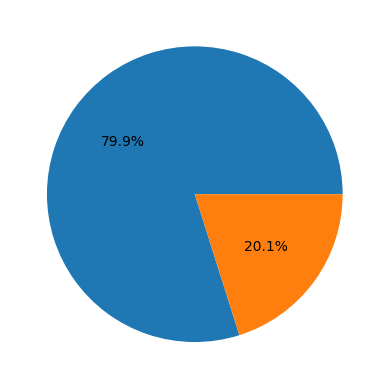

In [13]:
plt.pie(df['Class/ASD'].value_counts().values,autopct='%1.1f%%')
plt.show()

In [14]:
ints = []
objects = []
floats = []
for col in df.columns:
  if df[col].dtype==int:
    ints.append(col)
  elif df[col].dtype==object:
    objects.append(col)
  else:
    floats.append(col)

In [15]:
ints.remove('ID')
ints.remove('Class/ASD')

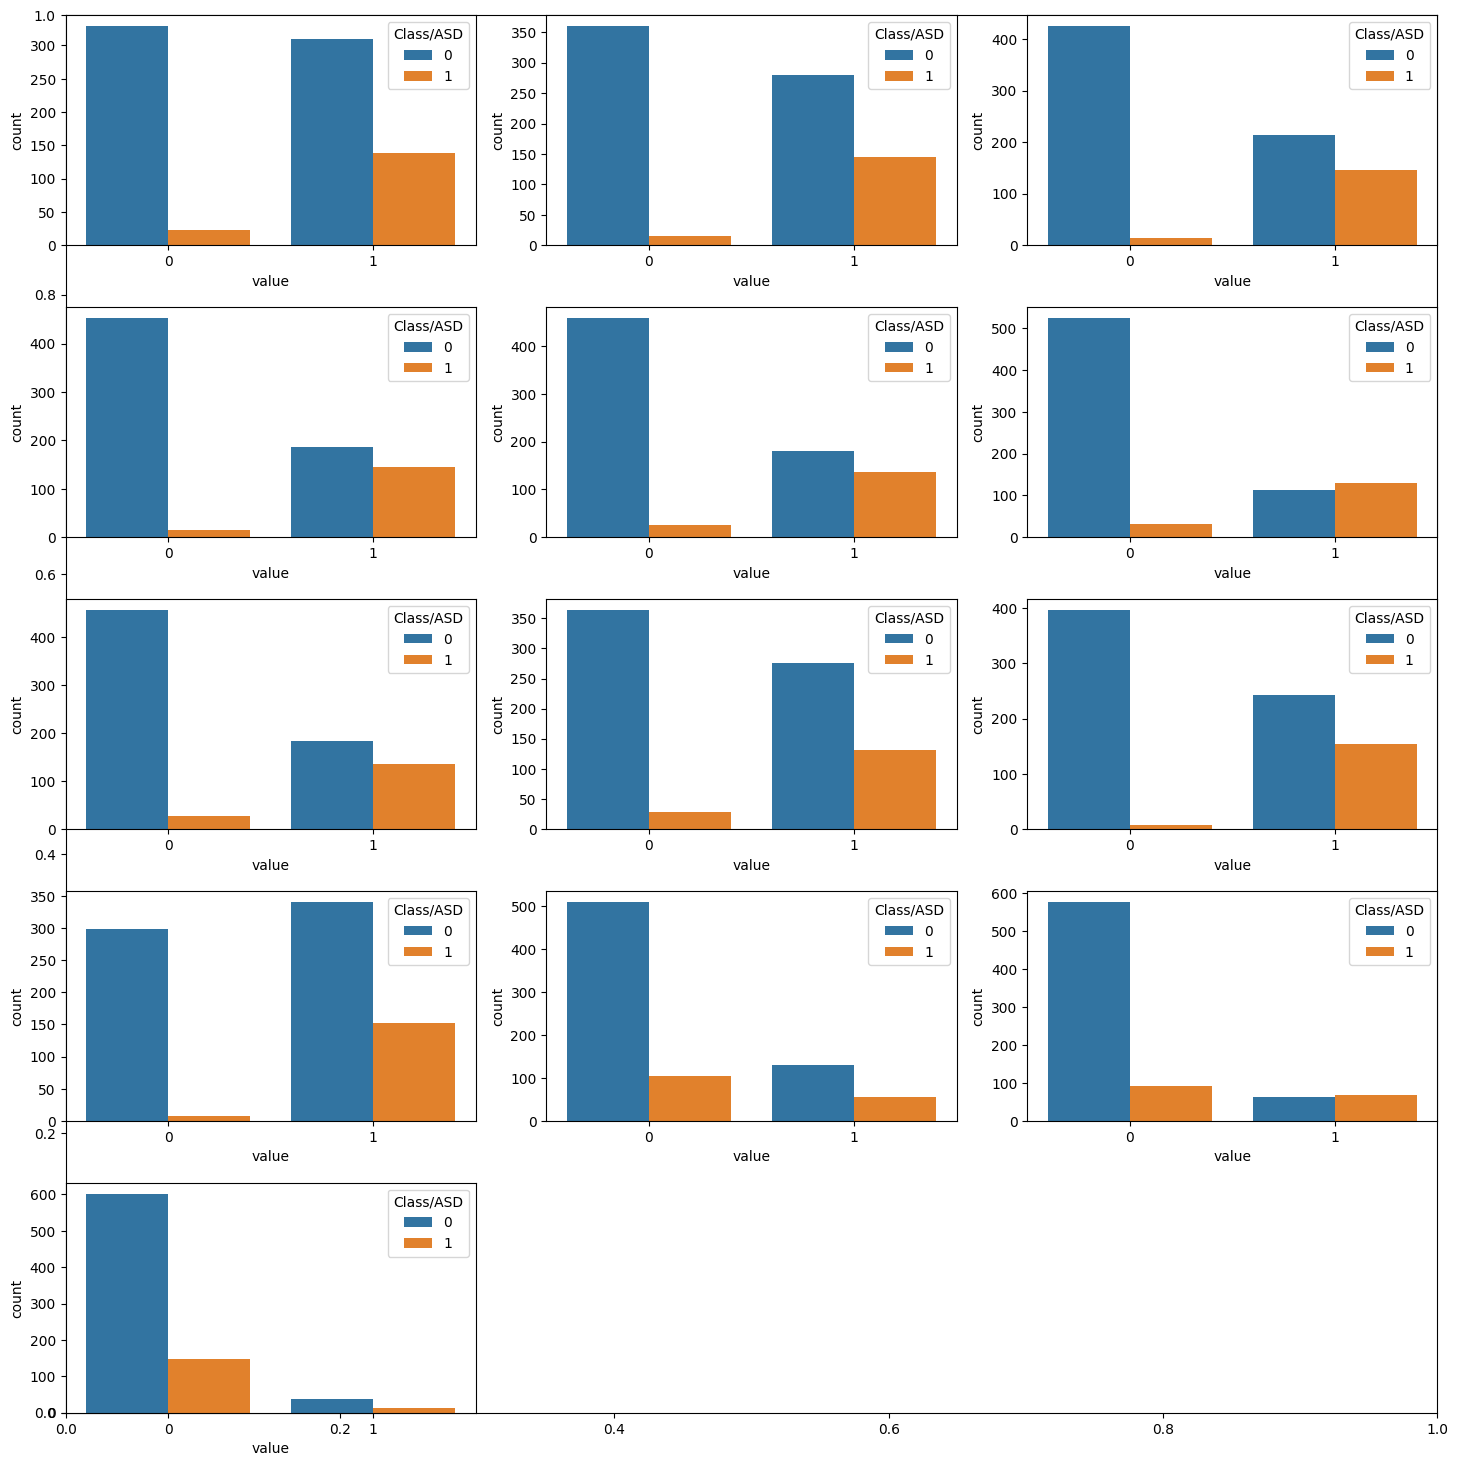

In [19]:
df_melted = df.melt(id_vars=['ID','Class/ASD'],value_vars=ints,var_name='col',value_name='value')
plt.subplots(figsize=(15,15))
for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  sns.countplot(x='value',hue='Class/ASD',data=df_melted[df_melted['col']==col])
plt.tight_layout()
plt.show()

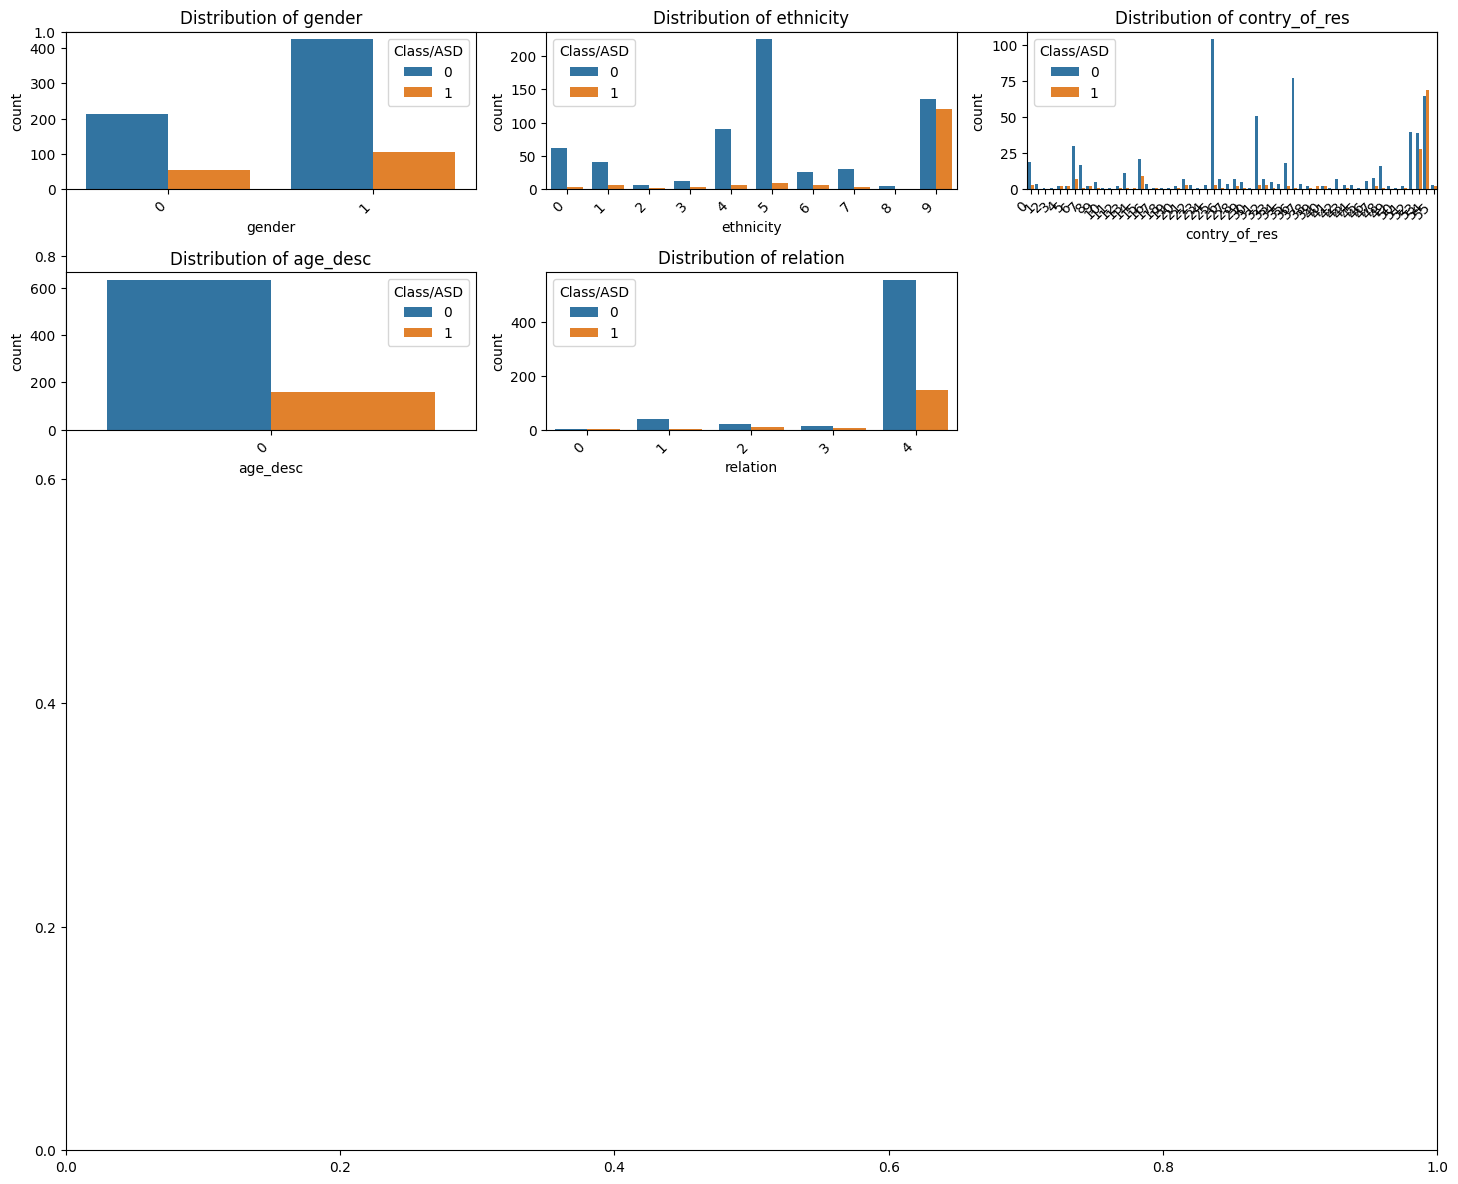

In [47]:
plt.subplots(figsize=(15,12))
for i, col in enumerate(objects):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=col,hue='Class/ASD',data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

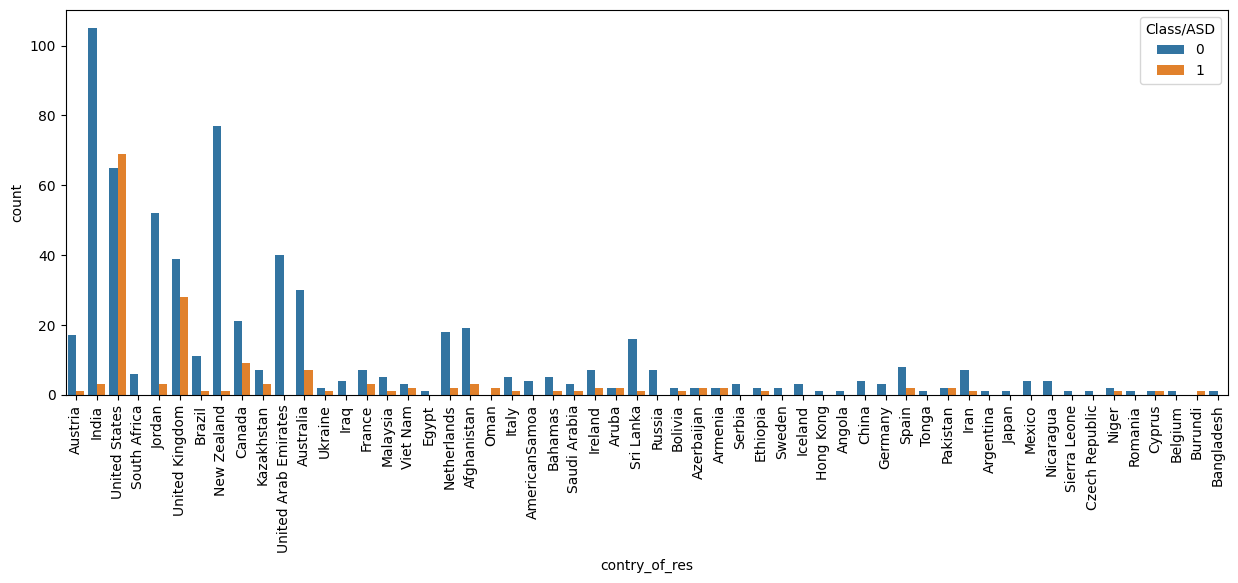

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='contry_of_res',hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

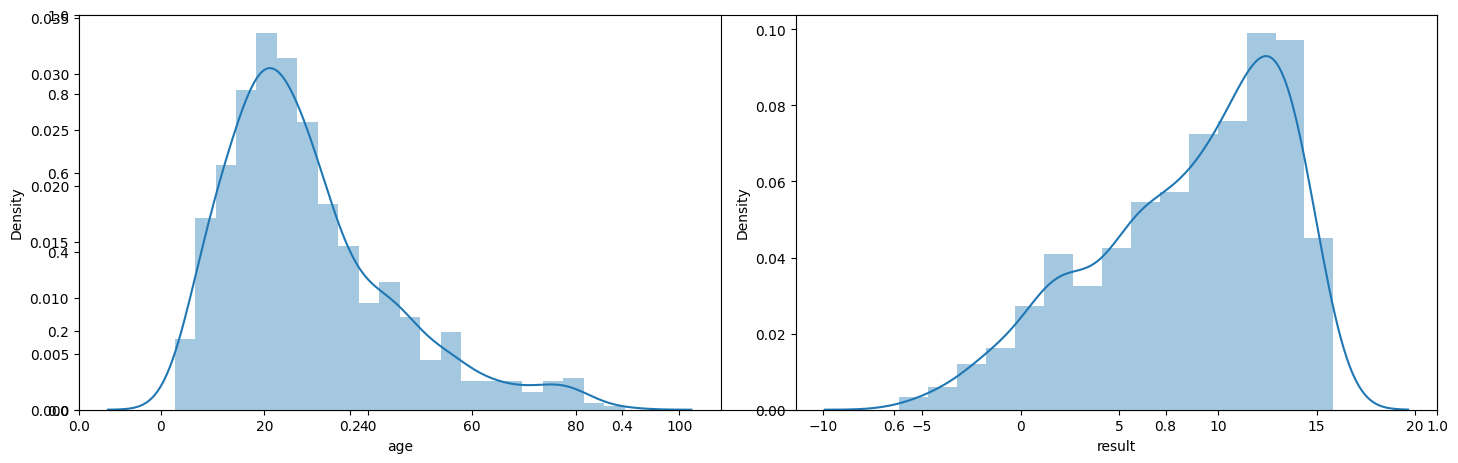

In [22]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()


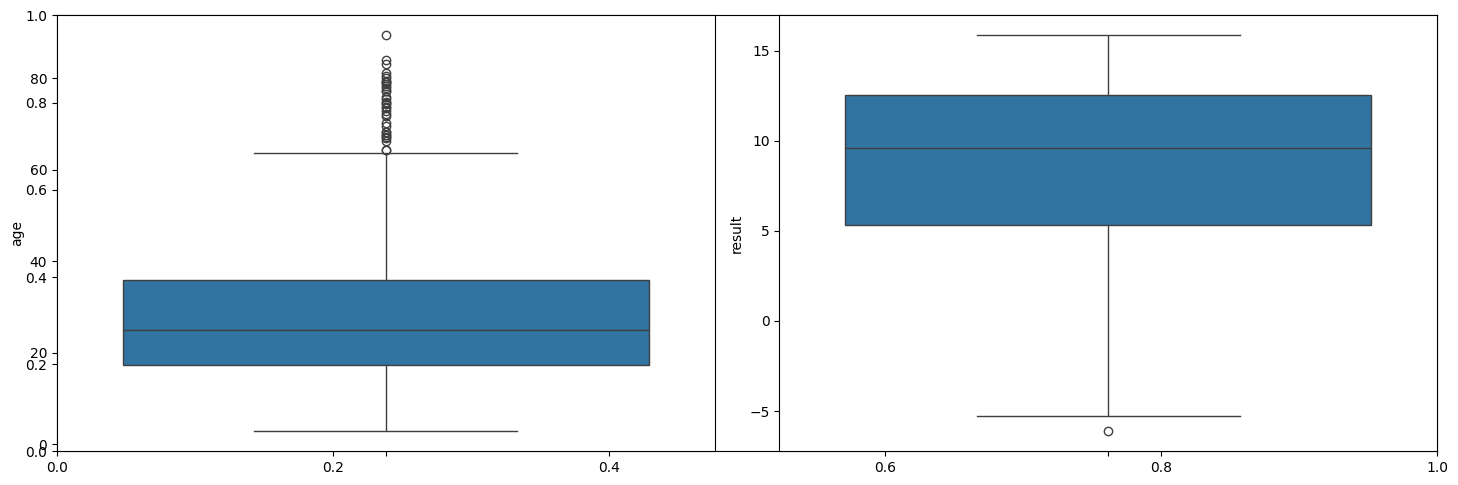

In [23]:
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()


In [24]:
df = df[df['result']>-5]
df.shape

(798, 22)

In [25]:
def convertAge(age):
    if age<4:
        return 'Toddler'
    elif age<12:
        return 'Kid'
    elif age<18:
        return 'Teenager'
    elif age<40:
        return 'Young'
    else:
        return 'Senior'
df['ageGroup'] = df['age'].apply(convertAge)


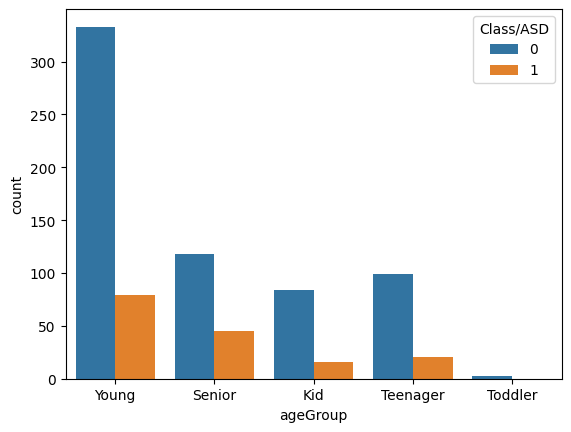

In [27]:
sns.countplot(x=df['ageGroup'],hue=df['Class/ASD'])
plt.show()

In [29]:
def add_feature(data):
  data['sum_score']= 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:
    data['sum_score']+= data[col]
  data['ind'] = data['austim']+data['used_app_before']+data['jaundice']
  return data
df=add_feature(df)

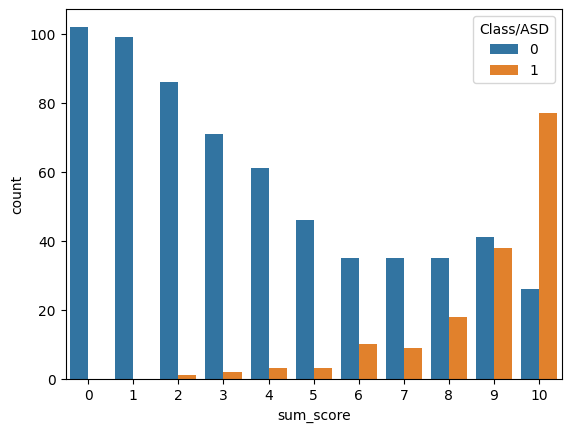

In [30]:
sns.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

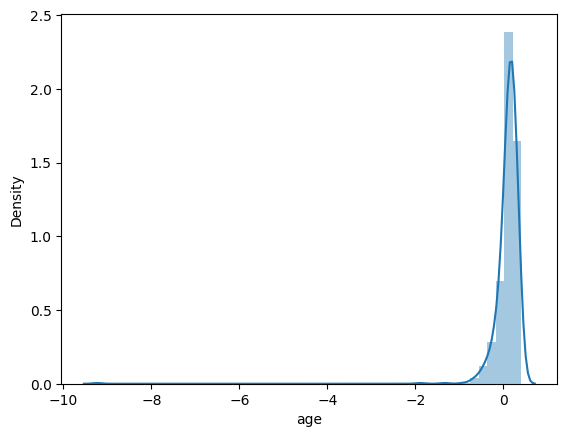

In [34]:
df['age'] = df['age'].apply(lambda x: np.log(x))
sns.distplot(df['age'])
plt.show()

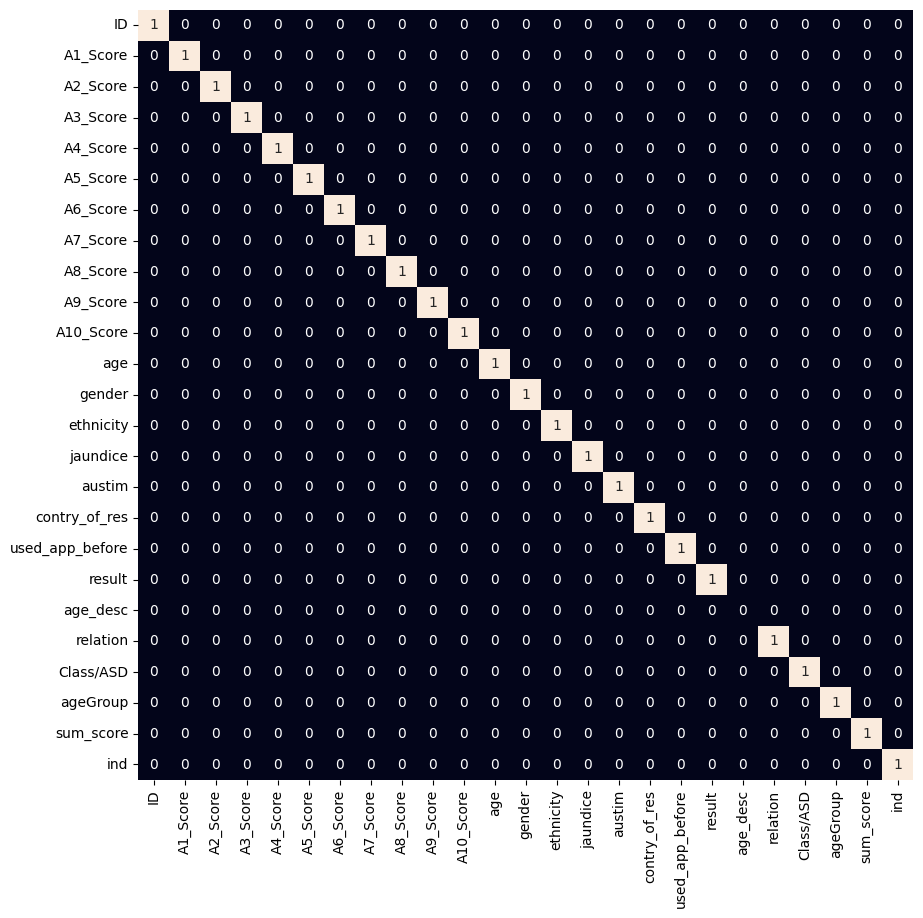

In [35]:
def encode_labels(data):
    for col in data.columns:
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    return data
df = encode_labels(df)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [36]:
removal=['ID','age_desc','used_app_before','austim']
features=df.drop(removal+['Class/ASD'],axis=1)
target=df['Class/ASD']

In [37]:
X_train,X_val,Y_train,Y_val=train_test_split(features, target, test_size = 0.2, random_state=10)
ros=RandomOverSampler(sampling_strategy='minority',random_state=0)
X,Y=ros.fit_resample(X_train,Y_train)
X.shape,Y.shape

((1026, 20), (1026,))

In [38]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_val=scaler.transform(X_val)

In [61]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
model_names = ['logistic_regression.pkl', 'xgboost.pkl', 'svc.pkl'] # Define model names

for i, model in enumerate(models):
    model.fit(X, Y)
    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
    print()

    # Save the model with the corresponding name
    with open(model_names[i], 'wb') as f:
        pickle.dump(model, f)

LogisticRegression() : 
Training Accuracy :  0.8654970760233919
Validation Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7491039426523298

SVC() : 
Training Accuracy :  0.9376218323586746
Validation Accur

In [71]:
import gradio as gr
import pickle
import pandas as pd

# Load the pre-trained model
with open('logistic_regression.pkl', 'rb') as f:
    model = pickle.load(f)

# Feature names based on the dataset
features = pd.DataFrame(columns=[
    "A1_Score", "A2_Score", "A3_Score", "A4_Score", "A5_Score", "A6_Score", "A7_Score",
    "A8_Score", "A9_Score", "A10_Score", "age", "gender", "ethnicity", "jaundice",
    "relation", "country_of_res", "result", "ageGroup", "sum_score", "ind"
])

# Define the input fields with Q&A labels
inputs = [
    gr.Number(label="What is the score for A1 (first assessment)?"),
    gr.Number(label="What is the score for A2 (second assessment)?"),
    gr.Number(label="What is the score for A3 (third assessment)?"),
    gr.Number(label="What is the score for A4 (fourth assessment)?"),
    gr.Number(label="What is the score for A5 (fifth assessment)?"),
    gr.Number(label="What is the score for A6 (sixth assessment)?"),
    gr.Number(label="What is the score for A7 (seventh assessment)?"),
    gr.Number(label="What is the score for A8 (eighth assessment)?"),
    gr.Number(label="What is the score for A9 (ninth assessment)?"),
    gr.Number(label="What is the score for A10 (tenth assessment)?"),
    gr.Number(label="How old is the individual?"),
    gr.Number(label="What is the gender of the individual? (1 for Male, 2 for Female)"),
    gr.Number(label="What is the ethnicity of the individual? (Provide code for ethnicity)"),
    gr.Number(label="Did the individual have jaundice as a child? (1 for Yes, 0 for No)"),
    gr.Number(label="What is the relationship of the individual to the respondent? (e.g., Parent, Sibling)"),
    gr.Number(label="What is the country of residence of the individual?"),
    gr.Number(label="What was the result of the autism test? (0 for No Autism, 1 for Autism)"),
    gr.Number(label="What is the age group classification of the individual?"),
    gr.Number(label="What is the sum of the A1 to A10 scores?"),
    gr.Number(label="What is the individual's identifier? (e.g., ID number)")
]

# Output will be a label that indicates the autism prediction
output = gr.Label(num_top_classes=2, label="Prediction: Will the individual be diagnosed with autism?")

# Prediction function
def predict_autism(*input_values):
    # Create a dictionary from input values and feature names
    input_data = dict(zip(features.columns, input_values))
    # Convert input data to a pandas DataFrame
    input_df = pd.DataFrame([input_data])
    # Make prediction using your loaded model
    prediction = model.predict(input_df)[0]
    # Return the prediction as a label (0 or 1)
    return {0: "No Autism", 1: "Autism"}[prediction]

# Create Gradio interface with a more interactive Q&A format
interface = gr.Interface(
    fn=predict_autism,
    inputs=inputs,
    outputs=output,
    live=True,
    title="Autism Prediction Model",
    description="Please answer the questions below about the individual to predict if they may be diagnosed with autism."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8e7082364ae53520d4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
